In [1]:
import os

def print_folder_image_stats(root_dir):
    # Dictionary to store folder image counts
    folder_image_counts = {}

    # Walk through all subdirectories and files in the root directory
    for root, dirs, files in os.walk(root_dir):
        # Filter for images ending with .tiff or .tif
        image_files = [file for file in files if file.lower().endswith(('.tiff', '.tif'))]
        
        if image_files:
            # Print the folder path and images
            print(f"Folder: {root}")
            print(f"Number of images: {len(image_files)}")
            #print(f"Images: {', '.join(image_files)}\n")

            # Save the count for the folder
            folder_image_counts[root] = len(image_files)
    
    # Print summary stats for class percentage/weightage
    total_images = sum(folder_image_counts.values())
    print(f"Total images across all folders: {total_images}")
    print("\nClass-wise percentage:")
    for folder, count in folder_image_counts.items():
        percentage = (count / total_images) * 100
        print(f"{folder}: {percentage:.2f}% ({count} images)")

# Path to the root directory
root_dir = r'C:\Users\k54739\Bibi_new_thesis\thesis\control_day7_day10'

# Call the function
print_folder_image_stats(root_dir)


Folder: C:\Users\k54739\Bibi_new_thesis\thesis\control_day7_day10\day10
Number of images: 130
Folder: C:\Users\k54739\Bibi_new_thesis\thesis\control_day7_day10\day7
Number of images: 130
Folder: C:\Users\k54739\Bibi_new_thesis\thesis\control_day7_day10\test\day10
Number of images: 26
Folder: C:\Users\k54739\Bibi_new_thesis\thesis\control_day7_day10\test\day7
Number of images: 26
Folder: C:\Users\k54739\Bibi_new_thesis\thesis\control_day7_day10\train\day10
Number of images: 104
Folder: C:\Users\k54739\Bibi_new_thesis\thesis\control_day7_day10\train\day7
Number of images: 104
Total images across all folders: 520

Class-wise percentage:
C:\Users\k54739\Bibi_new_thesis\thesis\control_day7_day10\day10: 25.00% (130 images)
C:\Users\k54739\Bibi_new_thesis\thesis\control_day7_day10\day7: 25.00% (130 images)
C:\Users\k54739\Bibi_new_thesis\thesis\control_day7_day10\test\day10: 5.00% (26 images)
C:\Users\k54739\Bibi_new_thesis\thesis\control_day7_day10\test\day7: 5.00% (26 images)
C:\Users\k5473

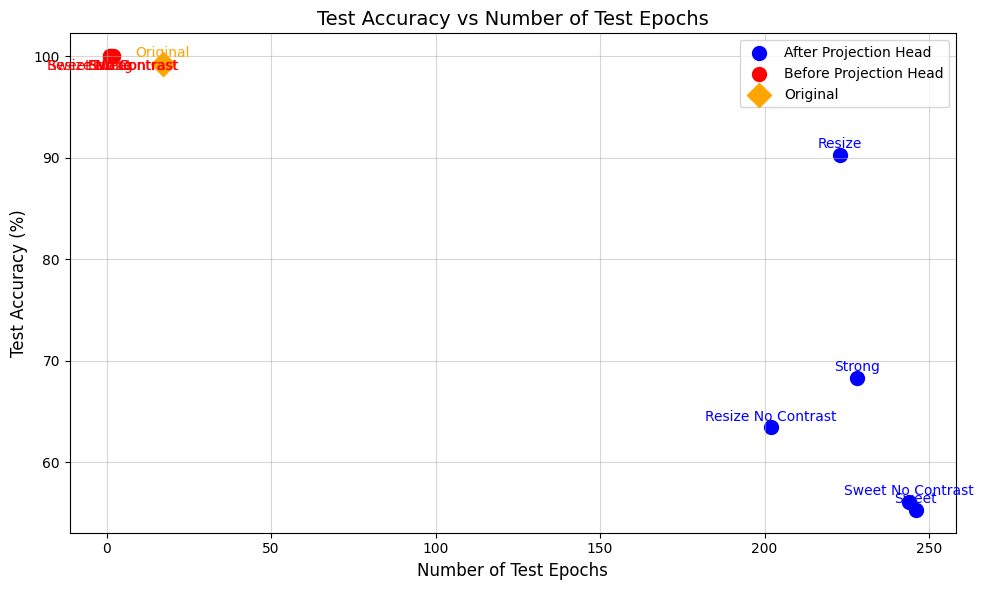

In [3]:
import matplotlib.pyplot as plt

# Data extracted from the table
augmentation_types = ["Strong", "Sweet", "Resize", "Resize No Contrast", "Sweet No Contrast"]

# After Projection Head
test_accuracy_after = [68.29, 55.28, 90.24, 63.41, 56.10]  # Test accuracy (After Projection Head)
test_epochs_after = [228, 246, 223, 202, 244]  # Validation epochs (used as test epochs)

# Before Projection Head
test_accuracy_before = [100, 100, 100, 100, 100]  # Test accuracy (Before Projection Head)
test_epochs_before = [1, 1, 1, 2, 2]  # Validation epochs (used as test epochs)

# Original
test_accuracy_original = [99.19]  # Test accuracy (Original)
test_epochs_original = [17]  # Validation epoch (used as test epoch)

# Plot
plt.figure(figsize=(10, 6))

# Scatter for 'After Projection Head'
plt.scatter(test_epochs_after, test_accuracy_after, color="blue", label="After Projection Head", s=100)

# Scatter for 'Before Projection Head'
plt.scatter(test_epochs_before, test_accuracy_before, color="red", label="Before Projection Head", s=100)

# Scatter for 'Original'
plt.scatter(test_epochs_original, test_accuracy_original, color="orange", label="Original", s=150, marker='D')

# Annotate points for 'After Projection Head'
for i, aug in enumerate(augmentation_types):
    plt.annotate(aug, (test_epochs_after[i], test_accuracy_after[i]), textcoords="offset points", xytext=(0, 5), ha='center', color="blue")

# Annotate points for 'Before Projection Head'
for i, aug in enumerate(augmentation_types):
    plt.annotate(aug, (test_epochs_before[i], test_accuracy_before[i]), textcoords="offset points", xytext=(0, -10), ha='center', color="red")

# Annotate point for 'Original'
plt.annotate("Original", (test_epochs_original[0], test_accuracy_original[0]), textcoords="offset points", xytext=(0, 5), ha='center', color="orange")

# Customize the plot
plt.title("Test Accuracy vs Number of Test Epochs", fontsize=14)
plt.xlabel("Number of Test Epochs", fontsize=12)
plt.ylabel("Test Accuracy (%)", fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


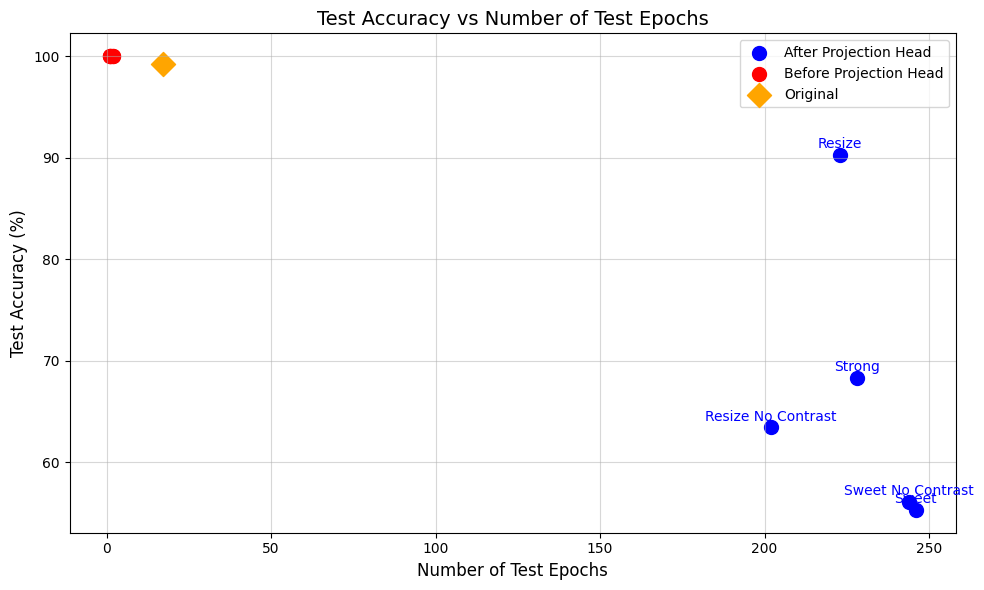

In [4]:
import matplotlib.pyplot as plt

# Data extracted from the table
augmentation_types = ["Strong", "Sweet", "Resize", "Resize No Contrast", "Sweet No Contrast"]

# After Projection Head
test_accuracy_after = [68.29, 55.28, 90.24, 63.41, 56.10]  # Test accuracy (After Projection Head)
test_epochs_after = [228, 246, 223, 202, 244]  # Validation epochs (used as test epochs)

# Before Projection Head
test_accuracy_before = [100, 100, 100, 100, 100]  # Test accuracy (Before Projection Head)
test_epochs_before = [1, 1, 1, 2, 2]  # Validation epochs (used as test epochs)

# Original
test_accuracy_original = [99.19]  # Test accuracy (Original)
test_epochs_original = [17]  # Validation epoch (used as test epoch)

# Plot
plt.figure(figsize=(10, 6))

# Scatter for 'After Projection Head'
plt.scatter(test_epochs_after, test_accuracy_after, color="blue", label="After Projection Head", s=100)

# Scatter for 'Before Projection Head'
plt.scatter(test_epochs_before, test_accuracy_before, color="red", label="Before Projection Head", s=100)

# Scatter for 'Original'
plt.scatter(test_epochs_original, test_accuracy_original, color="orange", label="Original", s=150, marker='D')

# Annotate points for 'After Projection Head' only
for i, aug in enumerate(augmentation_types):
    plt.annotate(aug, (test_epochs_after[i], test_accuracy_after[i]), textcoords="offset points", xytext=(0, 5), ha='center', color="blue")

# Customize the plot
plt.title("Test Accuracy vs Number of Test Epochs", fontsize=14)
plt.xlabel("Number of Test Epochs", fontsize=12)
plt.ylabel("Test Accuracy (%)", fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


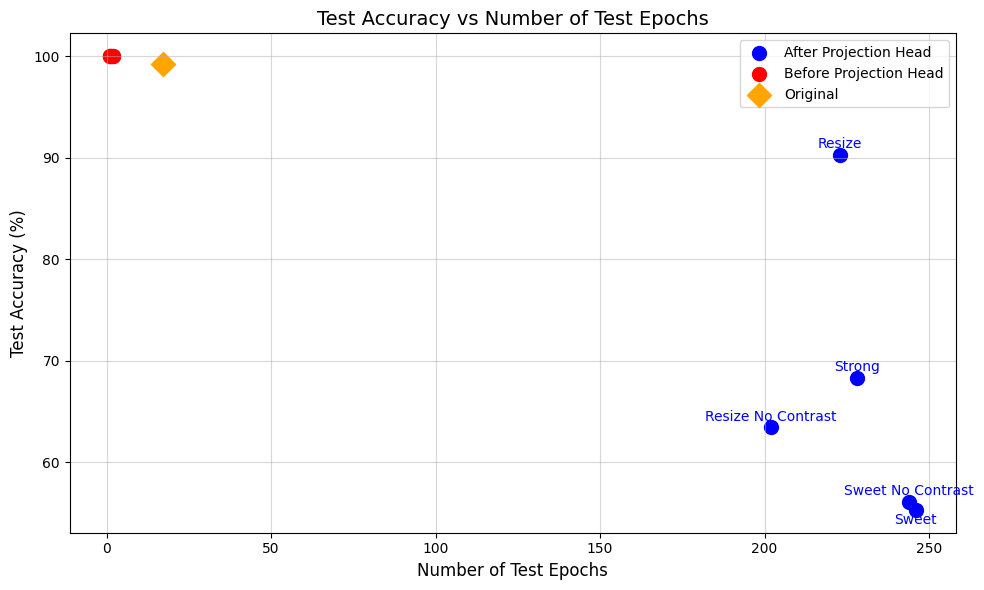

In [5]:
import matplotlib.pyplot as plt

# Data extracted from the table
augmentation_types = ["Strong", "Sweet", "Resize", "Resize No Contrast", "Sweet No Contrast"]

# After Projection Head
test_accuracy_after = [68.29, 55.28, 90.24, 63.41, 56.10]  # Test accuracy (After Projection Head)
test_epochs_after = [228, 246, 223, 202, 244]  # Validation epochs (used as test epochs)

# Before Projection Head
test_accuracy_before = [100, 100, 100, 100, 100]  # Test accuracy (Before Projection Head)
test_epochs_before = [1, 1, 1, 2, 2]  # Validation epochs (used as test epochs)

# Original
test_accuracy_original = [99.19]  # Test accuracy (Original)
test_epochs_original = [17]  # Validation epoch (used as test epoch)

# Plot
plt.figure(figsize=(10, 6))

# Scatter for 'After Projection Head'
plt.scatter(test_epochs_after, test_accuracy_after, color="blue", label="After Projection Head", s=100)

# Scatter for 'Before Projection Head'
plt.scatter(test_epochs_before, test_accuracy_before, color="red", label="Before Projection Head", s=100)

# Scatter for 'Original'
plt.scatter(test_epochs_original, test_accuracy_original, color="orange", label="Original", s=150, marker='D')

# Annotate points for 'After Projection Head'
for i, aug in enumerate(augmentation_types):
    if aug == "Sweet":
        # Label "Sweet" below the dot
        plt.annotate(aug, (test_epochs_after[i], test_accuracy_after[i]), textcoords="offset points", xytext=(0, -10), ha='center', color="blue")
    else:
        # Label others above the dot
        plt.annotate(aug, (test_epochs_after[i], test_accuracy_after[i]), textcoords="offset points", xytext=(0, 5), ha='center', color="blue")

# Customize the plot
plt.title("Test Accuracy vs Number of Test Epochs", fontsize=14)
plt.xlabel("Number of Test Epochs", fontsize=12)
plt.ylabel("Test Accuracy (%)", fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


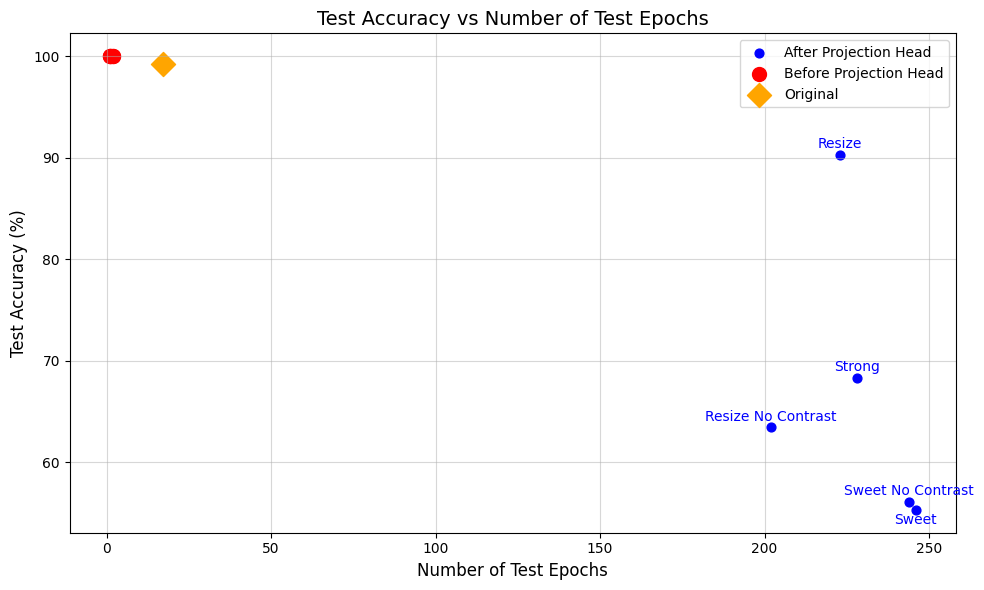

In [12]:
import matplotlib.pyplot as plt

# Data extracted from the table
augmentation_types = ["Strong", "Sweet", "Resize", "Resize No Contrast", "Sweet No Contrast"]

# After Projection Head
test_accuracy_after = [68.29, 55.28, 90.24, 63.41, 56.10]  # Test accuracy (After Projection Head)
test_epochs_after = [228, 246, 223, 202, 244]  # Validation epochs (used as test epochs)

# Before Projection Head
test_accuracy_before = [100, 100, 100, 100, 100]  # Test accuracy (Before Projection Head)
test_epochs_before = [1, 1, 1, 2, 2]  # Validation epochs (used as test epochs)

# Original
test_accuracy_original = [99.19]  # Test accuracy (Original)
test_epochs_original = [17]  # Validation epoch (used as test epoch)

# Plot
plt.figure(figsize=(10, 6))

# Scatter for 'After Projection Head' (smaller size)
plt.scatter(test_epochs_after, test_accuracy_after, color="blue", label="After Projection Head", s=40)

# Scatter for 'Before Projection Head'
plt.scatter(test_epochs_before, test_accuracy_before, color="red", label="Before Projection Head", s=100)

# Scatter for 'Original'
plt.scatter(test_epochs_original, test_accuracy_original, color="orange", label="Original", s=150, marker='D')

# Annotate points for 'After Projection Head'
for i, aug in enumerate(augmentation_types):
    if aug == "Sweet":
        # Label "Sweet" below the dot
        plt.annotate(aug, (test_epochs_after[i], test_accuracy_after[i]), textcoords="offset points", xytext=(0, -10), ha='center', color="blue")
    else:
        # Label others above the dot
        plt.annotate(aug, (test_epochs_after[i], test_accuracy_after[i]), textcoords="offset points", xytext=(0, 5), ha='center', color="blue")

# Customize the plot
plt.title("Test Accuracy vs Number of Test Epochs", fontsize=14)
plt.xlabel("Number of Test Epochs", fontsize=12)
plt.ylabel("Test Accuracy (%)", fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


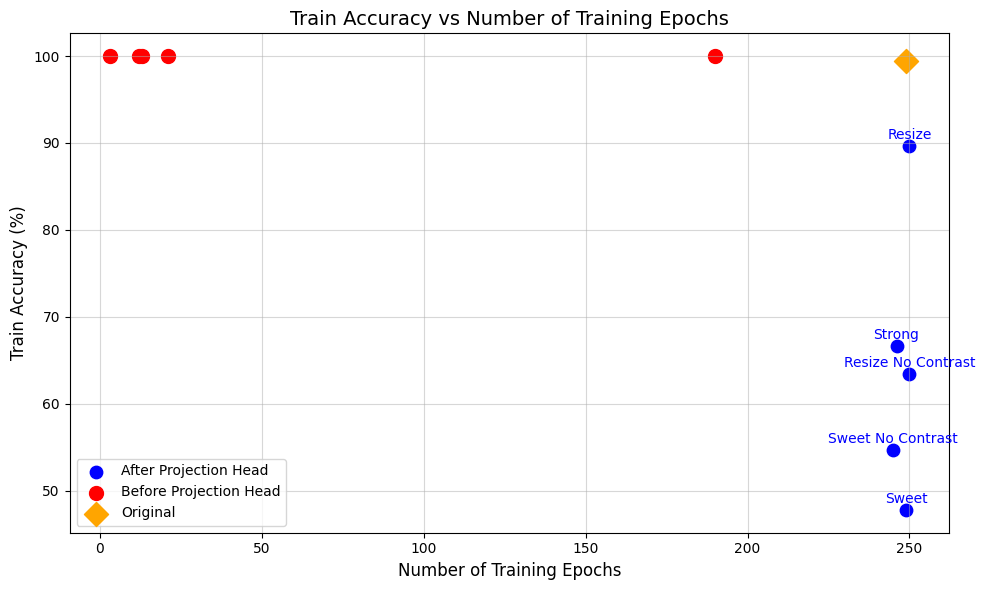

In [2]:
import matplotlib.pyplot as plt

# Data extracted from the table
augmentation_types = ["Strong", "Sweet", "Resize", "Resize No Contrast", "Sweet No Contrast"]

# After Projection Head
train_accuracy_after = [66.67, 47.76, 89.63, 63.41, 54.67]  # Train accuracy (After Projection Head)
train_epochs_after = [246, 249, 250, 250, 245]  # Train epochs

# Before Projection Head
train_accuracy_before = [100, 100, 100, 100, 100]  # Train accuracy (Before Projection Head)
train_epochs_before = [190, 3, 13, 12, 21]  # Train epochs

# Original
train_accuracy_original = [99.39]  # Train accuracy (Original)
train_epochs_original = [249]  # Train epochs

# Plot
plt.figure(figsize=(10, 6))

# Scatter for 'After Projection Head' (blue dots)
plt.scatter(train_epochs_after, train_accuracy_after, color="blue", label="After Projection Head", s=80)

# Scatter for 'Before Projection Head' (red dots)
plt.scatter(train_epochs_before, train_accuracy_before, color="red", label="Before Projection Head", s=100)

# Scatter for 'Original' (orange dot)
plt.scatter(train_epochs_original, train_accuracy_original, color="orange", label="Original", s=150, marker='D')

# Annotate points for 'After Projection Head'
for i, aug in enumerate(augmentation_types):
    plt.annotate(aug, (train_epochs_after[i], train_accuracy_after[i]), textcoords="offset points", xytext=(0, 5), ha='center', color="blue")

# Customize the plot
plt.title("Train Accuracy vs Number of Training Epochs", fontsize=14)
plt.xlabel("Number of Training Epochs", fontsize=12)
plt.ylabel("Train Accuracy (%)", fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


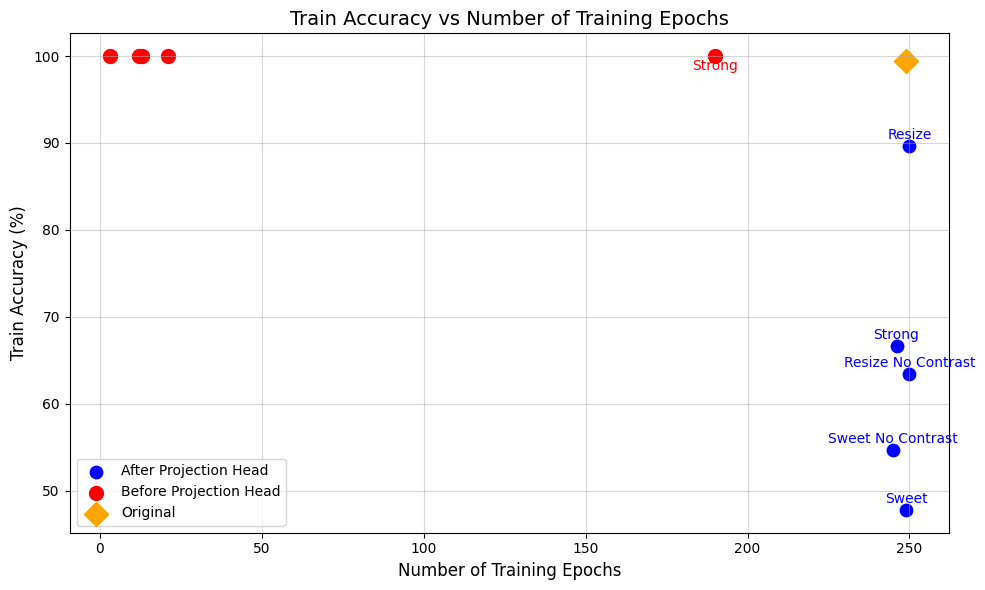

In [3]:
import matplotlib.pyplot as plt

# Data extracted from the table
augmentation_types = ["Strong", "Sweet", "Resize", "Resize No Contrast", "Sweet No Contrast"]

# After Projection Head
train_accuracy_after = [66.67, 47.76, 89.63, 63.41, 54.67]  # Train accuracy (After Projection Head)
train_epochs_after = [246, 249, 250, 250, 245]  # Train epochs

# Before Projection Head
train_accuracy_before = [100, 100, 100, 100, 100]  # Train accuracy (Before Projection Head)
train_epochs_before = [190, 3, 13, 12, 21]  # Train epochs

# Original
train_accuracy_original = [99.39]  # Train accuracy (Original)
train_epochs_original = [249]  # Train epochs

# Plot
plt.figure(figsize=(10, 6))

# Scatter for 'After Projection Head' (blue dots)
plt.scatter(train_epochs_after, train_accuracy_after, color="blue", label="After Projection Head", s=80)

# Scatter for 'Before Projection Head' (red dots)
plt.scatter(train_epochs_before, train_accuracy_before, color="red", label="Before Projection Head", s=100)

# Scatter for 'Original' (orange dot)
plt.scatter(train_epochs_original, train_accuracy_original, color="orange", label="Original", s=150, marker='D')

# Annotate points for 'After Projection Head'
for i, aug in enumerate(augmentation_types):
    plt.annotate(aug, (train_epochs_after[i], train_accuracy_after[i]), textcoords="offset points", xytext=(0, 5), ha='center', color="blue")

# Annotate "Strong" for 'Before Projection Head'
plt.annotate("Strong", (train_epochs_before[0], train_accuracy_before[0]), textcoords="offset points", xytext=(0, -10), ha='center', color="red")

# Customize the plot
plt.title("Train Accuracy vs Number of Training Epochs", fontsize=14)
plt.xlabel("Number of Training Epochs", fontsize=12)
plt.ylabel("Train Accuracy (%)", fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


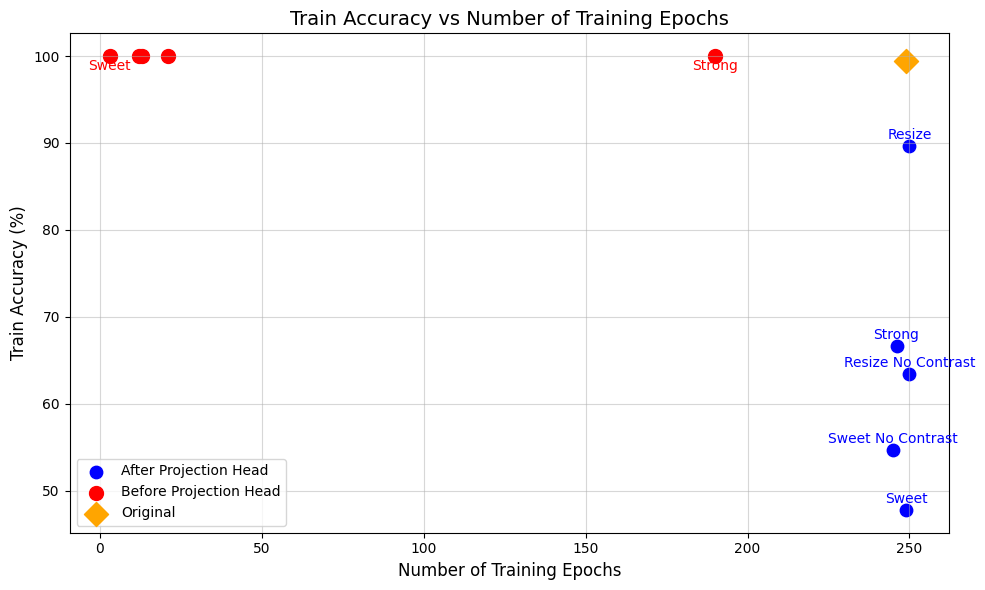

In [4]:
import matplotlib.pyplot as plt

# Data extracted from the table
augmentation_types = ["Strong", "Sweet", "Resize", "Resize No Contrast", "Sweet No Contrast"]

# After Projection Head
train_accuracy_after = [66.67, 47.76, 89.63, 63.41, 54.67]  # Train accuracy (After Projection Head)
train_epochs_after = [246, 249, 250, 250, 245]  # Train epochs

# Before Projection Head
train_accuracy_before = [100, 100, 100, 100, 100]  # Train accuracy (Before Projection Head)
train_epochs_before = [190, 3, 13, 12, 21]  # Train epochs

# Original
train_accuracy_original = [99.39]  # Train accuracy (Original)
train_epochs_original = [249]  # Train epochs

# Plot
plt.figure(figsize=(10, 6))

# Scatter for 'After Projection Head' (blue dots)
plt.scatter(train_epochs_after, train_accuracy_after, color="blue", label="After Projection Head", s=80)

# Scatter for 'Before Projection Head' (red dots)
plt.scatter(train_epochs_before, train_accuracy_before, color="red", label="Before Projection Head", s=100)

# Scatter for 'Original' (orange dot)
plt.scatter(train_epochs_original, train_accuracy_original, color="orange", label="Original", s=150, marker='D')

# Annotate points for 'After Projection Head'
for i, aug in enumerate(augmentation_types):
    plt.annotate(aug, (train_epochs_after[i], train_accuracy_after[i]), textcoords="offset points", xytext=(0, 5), ha='center', color="blue")

# Annotate "Strong" and "Sweet" for 'Before Projection Head'
plt.annotate("Strong", (train_epochs_before[0], train_accuracy_before[0]), textcoords="offset points", xytext=(0, -10), ha='center', color="red")
plt.annotate("Sweet", (train_epochs_before[1], train_accuracy_before[1]), textcoords="offset points", xytext=(0, -10), ha='center', color="red")

# Customize the plot
plt.title("Train Accuracy vs Number of Training Epochs", fontsize=14)
plt.xlabel("Number of Training Epochs", fontsize=12)
plt.ylabel("Train Accuracy (%)", fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


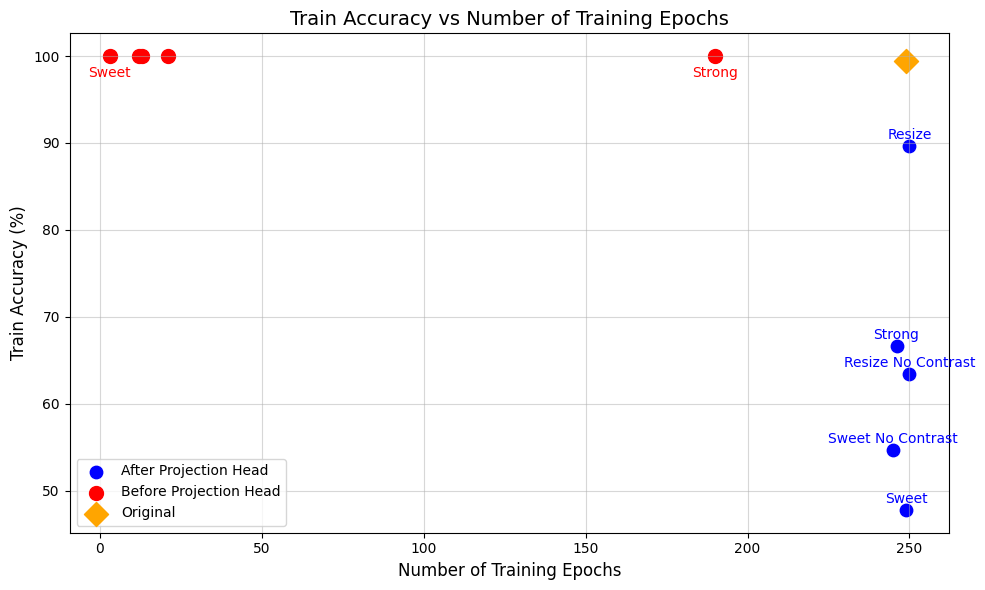

In [7]:
import matplotlib.pyplot as plt

# Data extracted from the table
augmentation_types = ["Strong", "Sweet", "Resize", "Resize No Contrast", "Sweet No Contrast"]

# After Projection Head
train_accuracy_after = [66.67, 47.76, 89.63, 63.41, 54.67]  # Train accuracy (After Projection Head)
train_epochs_after = [246, 249, 250, 250, 245]  # Train epochs

# Before Projection Head
train_accuracy_before = [100, 100, 100, 100, 100]  # Train accuracy (Before Projection Head)
train_epochs_before = [190, 3, 13, 12, 21]  # Train epochs

# Original
train_accuracy_original = [99.39]  # Train accuracy (Original)
train_epochs_original = [249]  # Train epochs

# Plot
plt.figure(figsize=(10, 6))

# Scatter for 'After Projection Head' (blue dots)
plt.scatter(train_epochs_after, train_accuracy_after, color="blue", label="After Projection Head", s=80)

# Scatter for 'Before Projection Head' (red dots)
plt.scatter(train_epochs_before, train_accuracy_before, color="red", label="Before Projection Head", s=100)

# Scatter for 'Original' (orange dot)
plt.scatter(train_epochs_original, train_accuracy_original, color="orange", label="Original", s=150, marker='D')

# Annotate points for 'After Projection Head'
for i, aug in enumerate(augmentation_types):
    plt.annotate(aug, (train_epochs_after[i], train_accuracy_after[i]), textcoords="offset points", xytext=(0, 5), ha='center', color="blue")

# Annotate "Strong" and "Sweet" for 'Before Projection Head' with more gap between red dots and names
plt.annotate("Strong", (train_epochs_before[0], train_accuracy_before[0]), textcoords="offset points", xytext=(0, -15), ha='center', color="red")
plt.annotate("Sweet", (train_epochs_before[1], train_accuracy_before[1]), textcoords="offset points", xytext=(0, -15), ha='center', color="red")

# Customize the plot
plt.title("Train Accuracy vs Number of Training Epochs", fontsize=14)
plt.xlabel("Number of Training Epochs", fontsize=12)
plt.ylabel("Train Accuracy (%)", fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


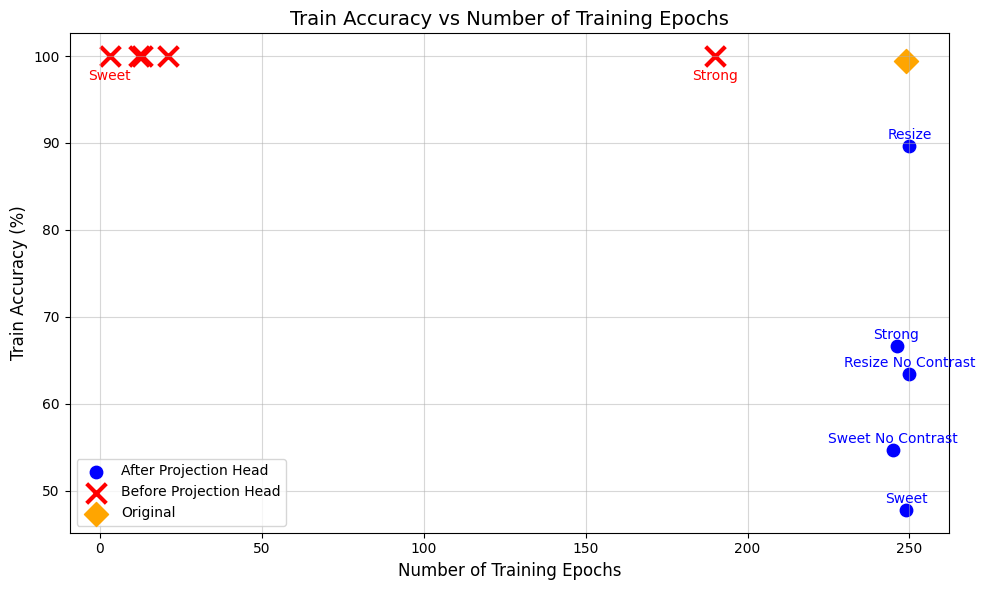

In [10]:
import matplotlib.pyplot as plt

# Data extracted from the table
augmentation_types = ["Strong", "Sweet", "Resize", "Resize No Contrast", "Sweet No Contrast"]

# After Projection Head
train_accuracy_after = [66.67, 47.76, 89.63, 63.41, 54.67]  # Train accuracy (After Projection Head)
train_epochs_after = [246, 249, 250, 250, 245]  # Train epochs

# Before Projection Head
train_accuracy_before = [100, 100, 100, 100, 100]  # Train accuracy (Before Projection Head)
train_epochs_before = [190, 3, 13, 12, 21]  # Train epochs

# Original
train_accuracy_original = [99.39]  # Train accuracy (Original)
train_epochs_original = [249]  # Train epochs

# Plot
plt.figure(figsize=(10, 6))

# Scatter for 'After Projection Head' (blue dots)
plt.scatter(train_epochs_after, train_accuracy_after, color="blue", label="After Projection Head", s=80)

# Scatter for 'Before Projection Head' (red crosses)
plt.scatter(train_epochs_before, train_accuracy_before, color="red", label="Before Projection Head", s=200, marker='x', linewidths=3)

# Scatter for 'Original' (orange dot)
plt.scatter(train_epochs_original, train_accuracy_original, color="orange", label="Original", s=150, marker='D')

# Annotate points for 'After Projection Head'
for i, aug in enumerate(augmentation_types):
    plt.annotate(aug, (train_epochs_after[i], train_accuracy_after[i]), textcoords="offset points", xytext=(0, 5), ha='center', color="blue")

# Annotate "Strong" and "Sweet" for 'Before Projection Head' with more gap between red crosses and names
plt.annotate("Strong", (train_epochs_before[0], train_accuracy_before[0]), textcoords="offset points", xytext=(0, -17), ha='center', color="red")
plt.annotate("Sweet", (train_epochs_before[1], train_accuracy_before[1]), textcoords="offset points", xytext=(0, -17), ha='center', color="red")

# Customize the plot
plt.title("Train Accuracy vs Number of Training Epochs", fontsize=14)
plt.xlabel("Number of Training Epochs", fontsize=12)
plt.ylabel("Train Accuracy (%)", fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


In [4]:
import os

def print_folder_image_stats(root_dir):
    # Dictionary to store folder image counts
    folder_image_counts = {}
    aggregated_group_counts = {}

    # Walk through all subdirectories and files in the root directory
    for root, dirs, files in os.walk(root_dir):
        # Filter for images ending with .tiff or .tif
        image_files = [file for file in files if file.lower().endswith(('.tiff', '.tif'))]

        # Check if this folder is a "group" folder
        parent_dir = os.path.basename(root)
        if parent_dir.lower().startswith('group'):
            # Aggregate group counts into their parent directory
            parent_path = os.path.dirname(root)
            if parent_path not in aggregated_group_counts:
                aggregated_group_counts[parent_path] = 0
            aggregated_group_counts[parent_path] += len(image_files)
        else:
            if image_files:
                # Save the count for the folder
                folder_image_counts[root] = len(image_files)
    
    # Add aggregated group counts to folder_image_counts
    for parent, count in aggregated_group_counts.items():
        folder_image_counts[parent] = folder_image_counts.get(parent, 0) + count

    # Print summary for each folder
    total_images = sum(folder_image_counts.values())
    print(f"Total images across all folders: {total_images}")
    print("\nClass-wise percentage:")
    for folder, count in folder_image_counts.items():
        percentage = (count / total_images) * 100
        print(f"{folder}: {percentage:.2f}% ({count} images)")

# Path to the root directory
root_dir = r'C:\Users\k54739\Today_data\categorized'

# Call the function
print_folder_image_stats(root_dir)



Total images across all folders: 1321

Class-wise percentage:
C:\Users\k54739\Today_data\categorized\drugscrenn_categorized\RBT DS 4.1 Day7,10\Day10: 4.69% (62 images)
C:\Users\k54739\Today_data\categorized\drugscrenn_categorized\RBTDS 6.1 Day7,8,9,10\Day10: 4.92% (65 images)
C:\Users\k54739\Today_data\categorized\single_dose_categarized\RBT 01.04 Day 7,10\After Day10\treated: 2.20% (29 images)
C:\Users\k54739\Today_data\categorized\single_dose_categarized\RBT 01.04 Day 7,10\After Day10\untreated: 2.27% (30 images)
C:\Users\k54739\Today_data\categorized\single_dose_categarized\RBT 01.04 Day 7,10\Before (untreated) Day7\Acquisition: 4.54% (60 images)
C:\Users\k54739\Today_data\categorized\single_dose_categarized\RBT 01.09 Day10\treated: 2.27% (30 images)
C:\Users\k54739\Today_data\categorized\single_dose_categarized\RBT 01.09 Day10\untreated: 2.27% (30 images)
C:\Users\k54739\Today_data\categorized\single_dose_categarized\RBT 01.10 Day10\treated: 2.20% (29 images)
C:\Users\k54739\Today_

In [10]:
import os

def print_folder_image_stats(root_dir):
    # Dictionary to store folder image counts
    folder_image_counts = {}
    aggregated_group_counts = {}

    # Walk through all subdirectories and files in the root directory
    for root, dirs, files in os.walk(root_dir):
        # Filter for images ending with .tiff or .tif
        image_files = [file for file in files if file.lower().endswith(('.tiff', '.tif'))]

        # Check if this folder is a "group" folder
        parent_dir = os.path.basename(root)
        if parent_dir.lower().startswith('group'):
            # Aggregate group counts into their parent directory
            parent_path = os.path.dirname(root)
            if parent_path not in aggregated_group_counts:
                aggregated_group_counts[parent_path] = 0
            aggregated_group_counts[parent_path] += len(image_files)
        else:
            if image_files:
                # Save the count for the folder
                folder_image_counts[root] = len(image_files)
    
    # Add aggregated group counts to folder_image_counts
    for parent, count in aggregated_group_counts.items():
        folder_image_counts[parent] = folder_image_counts.get(parent, 0) + count

    # Print summary for each folder
    total_images = sum(folder_image_counts.values())
    print(f"Total images across all folders: {total_images}")
    print("\nClass-wise percentage:")
    for folder, count in folder_image_counts.items():
        percentage = (count / total_images) * 100
        print(f"{folder}: {percentage:.2f}% ({count} images)")

# Path to the root directory
root_dir = r'C:\Users\k54739\Today_data\combined_1259\pre_simclr'

# Call the function
print_folder_image_stats(root_dir)



Total images across all folders: 1254

Class-wise percentage:
C:\Users\k54739\Today_data\combined_1259\pre_simclr\day7toDay10\RBT 01.04 Day 7,10\After Day10\treated: 2.31% (29 images)
C:\Users\k54739\Today_data\combined_1259\pre_simclr\day7toDay10\RBT 01.04 Day 7,10\After Day10\untreated: 2.39% (30 images)
C:\Users\k54739\Today_data\combined_1259\pre_simclr\day7toDay10\RBT 01.04 Day 7,10\Before (untreated) Day7\Acquisition: 4.78% (60 images)
C:\Users\k54739\Today_data\combined_1259\pre_simclr\single_dose_categarized\RBT 01.09 Day10\treated: 2.39% (30 images)
C:\Users\k54739\Today_data\combined_1259\pre_simclr\single_dose_categarized\RBT 01.09 Day10\untreated: 2.39% (30 images)
C:\Users\k54739\Today_data\combined_1259\pre_simclr\single_dose_categarized\RBT 01.10 Day10\treated: 2.31% (29 images)
C:\Users\k54739\Today_data\combined_1259\pre_simclr\single_dose_categarized\RBT 01.10 Day10\untreated: 2.07% (26 images)
C:\Users\k54739\Today_data\combined_1259\pre_simclr\single_dose_categarize

In [ ]:
import os
import shutil

def copy_and_rename_images(source_dir, target_dir):
    # Ensure target directory exists
    os.makedirs(target_dir, exist_ok=True)

    # Counter for renamed files
    image_counter = 0

    # Walk through all subdirectories and files in the source directory
    for root, dirs, files in os.walk(source_dir):
        for file in files:
            if file.lower().endswith(('.tiff', '.tif')):
                image_counter += 1

                # Get the source file path
                src_path = os.path.join(root, file)

                # Determine the new filename and path
                file_extension = os.path.splitext(file)[-1]
                new_filename = f"{image_counter}{file_extension}"
                dest_path = os.path.join(target_dir, new_filename)

                # Copy the file to the target directory
                shutil.copy(src_path, dest_path)

    # Print the total number of images
    print(f"Total number of images processed: {image_counter}")

# Paths
source_dir = r'C:\Users\k54739\Today_data\Today_combined'
target_dir = r'C:\Users\k54739\Today_data\Final_simclr'

# Call the function
copy_and_rename_images(source_dir, target_dir)
#total number of image processed: 1259

In [ ]:
import os
import shutil

def rename_and_copy_images(input_path, output_path, prefix='sd_114_'):
    # Ensure the output directory exists
    os.makedirs(output_path, exist_ok=True)
    
    # Loop through all files in the input directory
    for file in os.listdir(input_path):
        # Check if the file is a TIFF image
        if file.endswith('.tiff'):
            # Define the old and new file paths
            old_path = os.path.join(input_path, file)
            new_filename = prefix + file
            new_path = os.path.join(output_path, new_filename)
            
            # Copy and rename the file to the output directory
            shutil.copy(old_path, new_path)
            print(f"Copied and renamed: {old_path} -> {new_path}")

# Example usage
input_path = r'C:\Users\k54739\Today_data\single_dose_categarized\RBT 01.14 Day10\untreated'
output_path = r'C:\Users\k54739\Today_data\Day10_drugscreened&singledose_untreated'
rename_and_copy_images(input_path, output_path)


In [1]:
import os
import shutil
import random

def split_dataset(day7_dir, day10_dir, train_dir, test_dir, test_percentage=0.2):
    # Get all filenames from the day7 folder
    day7_files = [file for file in os.listdir(day7_dir) if file.endswith('.tiff')]
    
    # Shuffle the files for randomness
    random.shuffle(day7_files)
    
    # Calculate split sizes
    total_files = len(day7_files)
    test_size = int(total_files * test_percentage)
    train_size = total_files - test_size
    
    # Split the filenames
    test_files = day7_files[:test_size]
    train_files = day7_files[test_size:]
    
    # Define output directories
    train_day7_dir = os.path.join(train_dir, 'day7')
    train_day10_dir = os.path.join(train_dir, 'day10')
    test_day7_dir = os.path.join(test_dir, 'day7')
    test_day10_dir = os.path.join(test_dir, 'day10')
    
    # Ensure output directories exist
    os.makedirs(train_day7_dir, exist_ok=True)
    os.makedirs(train_day10_dir, exist_ok=True)
    os.makedirs(test_day7_dir, exist_ok=True)
    os.makedirs(test_day10_dir, exist_ok=True)
    
    # Helper function to copy files
    def copy_files(file_list, src_day7, src_day10, dest_day7, dest_day10):
        for file in file_list:
            shutil.copy(os.path.join(src_day7, file), os.path.join(dest_day7, file))
            shutil.copy(os.path.join(src_day10, file), os.path.join(dest_day10, file))
    
    # Copy train files
    copy_files(train_files, day7_dir, day10_dir, train_day7_dir, train_day10_dir)
    print(f"Copied {len(train_files)} files to training set.")
    
    # Copy test files
    copy_files(test_files, day7_dir, day10_dir, test_day7_dir, test_day10_dir)
    print(f"Copied {len(test_files)} files to test set.")

# Paths
day7_dir = r'C:\Users\k54739\Bibi_new_thesis\thesis\control_day7_day10\day7'
day10_dir = r'C:\Users\k54739\Bibi_new_thesis\thesis\control_day7_day10\day10'
train_dir = r'C:\Users\k54739\Bibi_new_thesis\thesis\control_day7_day10\train'
test_dir = r'C:\Users\k54739\Bibi_new_thesis\thesis\control_day7_day10\test'

# Split dataset
split_dataset(day7_dir, day10_dir, train_dir, test_dir, test_percentage=0.2)


Copied 104 files to training set.
Copied 26 files to test set.


In [ ]:
import tifffile as tiff

def check_image_layers(image_dir):
    # Get all TIFF images in the directory
    image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.tiff')]
    
    # Loop through each image and check its layers
    for img_path in image_files:
        image = tiff.imread(img_path)
        
        # Check if the image has exactly 3 layers (channels)
        if image.shape[0]  3:
            print(f"Warning: Image {img_path} has less than 3 layers. (Found {image.shape[0]} layers)")

# Example usage
image_dir = r"../../Day10_drugscreened&singledose_untreated"
check_image_layers(image_dir)

In [11]:
import tifffile as tiff

def check_image_layers(image_dir):
    # Get all TIFF images in the directory
    image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.tiff')]
    
    # Loop through each image and check its layers
    for img_path in image_files:
        image = tiff.imread(img_path)
        
        # Check if the image has exactly 3 layers (channels)
        if image.shape[0] < 3:
            print(f"Warning: Image {img_path} has less than 3 layers. (Found {image.shape[0]} layers)")

# Example usage
image_dir = r"../../Day10_drugscreened&singledose_untreated"
check_image_layers(image_dir)

In [2]:
import os
import numpy as np
import tifffile as tiff

def replace_with_3_sharpest_layers(image_dir):
    # Get all TIFF images in the directory
    image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.tiff')]
    
    # Process each image
    for img_path in image_files:
        # Read the image
        image = tiff.imread(img_path)
        
        # Check the number of layers and dimensions of the image
        if image.ndim == 2:  # Image is 2D, likely a single-channel image
            print(f"Warning: Image {img_path} is single-channel (dimensions: {image.shape}).")
            continue  # Skip processing for this image
        elif image.shape[0] < 3:  # Fewer than 3 layers
            print(f"Warning: Image {img_path} has less than 3 layers. (Found {image.shape[0]} layers)")
            continue  # Skip processing for this image

        # If the image has more than 3 layers, proceed
        if image.shape[0] > 3:
            print(f"Processing {img_path} with {image.shape[0]} layers.")
            
            # Normalize the 16-bit image to [0, 1] for consistent sharpness calculation
            image_normalized = image.astype(np.float32) / 65535.0
            
            # Calculate sharpness for each layer
            sharpness_scores = []
            for i in range(image.shape[0]):
                layer = image_normalized[i]
                gy, gx = np.gradient(layer)  # Compute gradients
                gnorm = np.sqrt(gx**2 + gy**2)  # Gradient magnitude
                sharpness = np.average(gnorm)  # Average sharpness
                sharpness_scores.append((sharpness, i))  # Store with index
            
            # Sort layers by sharpness score and select the top 3 sharpest layers
            sharpest_layers = sorted(sharpness_scores, reverse=True, key=lambda x: x[0])[:3]
            top_3_indices = [index for _, index in sharpest_layers]
            
            # Create a new image with only the 3 sharpest layers
            new_image = image[top_3_indices, :, :]
            
            # Save the new image to replace the original
            tiff.imwrite(img_path, new_image.astype(np.uint16))
            print(f"Replaced {img_path} with the 3 sharpest layers.")

# Example usage
image_dir = r"C:\Users\k54739\Bibi_new_thesis\thesis\control_day7_day10\day10"
replace_with_3_sharpest_layers(image_dir)


Processing C:\Users\k54739\Bibi_new_thesis\thesis\control_day7_day10\day10\RBTDS_4.2_D07-T01.tiff with 5 layers.
Replaced C:\Users\k54739\Bibi_new_thesis\thesis\control_day7_day10\day10\RBTDS_4.2_D07-T01.tiff with the 3 sharpest layers.
Processing C:\Users\k54739\Bibi_new_thesis\thesis\control_day7_day10\day10\RBTDS_4.2_D08-T01.tiff with 5 layers.
Replaced C:\Users\k54739\Bibi_new_thesis\thesis\control_day7_day10\day10\RBTDS_4.2_D08-T01.tiff with the 3 sharpest layers.
Processing C:\Users\k54739\Bibi_new_thesis\thesis\control_day7_day10\day10\RBTDS_4.2_D09-T01.tiff with 5 layers.
Replaced C:\Users\k54739\Bibi_new_thesis\thesis\control_day7_day10\day10\RBTDS_4.2_D09-T01.tiff with the 3 sharpest layers.
Processing C:\Users\k54739\Bibi_new_thesis\thesis\control_day7_day10\day10\RBTDS_4.2_D10-T01.tiff with 5 layers.
Replaced C:\Users\k54739\Bibi_new_thesis\thesis\control_day7_day10\day10\RBTDS_4.2_D10-T01.tiff with the 3 sharpest layers.
Processing C:\Users\k54739\Bibi_new_thesis\thesis\co

In [16]:
path = r'C:\Users\k54739\Bibi_new_thesis\thesis\Day10_drugscreened&singledose_untreated\ds_41_E11-T01.tiff'   #we removed this image because it only have one channel.
imageds = tiff.imread(path)

In [17]:
imageds.shape

(2054, 2456)

In [1]:
import os
import numpy as np
import tifffile as tiff

def single_channel_conversion(in_image_dir, out_image_dir):
    # Ensure output directory exists
    os.makedirs(out_image_dir, exist_ok=True)
    
    # Loop over all files in the input directory
    for filename in os.listdir(in_image_dir):
        # Check if the file is a TIFF image
        if filename.endswith(".tiff") or filename.endswith(".tif"):
            in_image_path = os.path.join(in_image_dir, filename)
            out_image_path = os.path.join(out_image_dir, filename)
            
            # Read the input image
            image = tiff.imread(in_image_path)

            # Ensure the image has 3 layers (channels)
            #if image.shape[0] != 3:
                #raise ValueError(f"Image {in_image_path} does not have exactly 3 layers.")
            
            # Normalize the 16-bit image to [0, 1]
            image_normalized = image.astype(np.float32) / 65535.0
            
            # Calculate sharpness for each layer
            sharpness_scores = []
            for i in range(3):
                layer = image_normalized[i]
                gy, gx = np.gradient(layer)
                gnorm = np.sqrt(gx**2 + gy**2)
                sharpness = np.average(gnorm)
                sharpness_scores.append(sharpness)
            
            # Find the index of the sharpest layer
            sharpest_layer_index = np.argmax(sharpness_scores)
            sharpest_layer_image = image[sharpest_layer_index]

            # Save the sharpest layer as a new image (scaled back to 16-bit)
            tiff.imwrite(out_image_path, (sharpest_layer_image).astype(np.uint16))

            print(f"Processed {filename}, saved sharpest layer to {out_image_path}")

# Example usage
in_image_dir = r"../../Day10_drugscreened&singledose_untreated"
out_image_dir = r"../../single_Day10_drugscreened&singledose_untreated"
single_channel_conversion(in_image_dir, out_image_dir)


Processed ds_41_D07-T01.tiff, saved sharpest layer to ../../single_Day10_drugscreened&singledose_untreated\ds_41_D07-T01.tiff
Processed ds_41_D08-T01.tiff, saved sharpest layer to ../../single_Day10_drugscreened&singledose_untreated\ds_41_D08-T01.tiff
Processed ds_41_D09-T01.tiff, saved sharpest layer to ../../single_Day10_drugscreened&singledose_untreated\ds_41_D09-T01.tiff
Processed ds_41_D10-T01.tiff, saved sharpest layer to ../../single_Day10_drugscreened&singledose_untreated\ds_41_D10-T01.tiff
Processed ds_41_D11-T01.tiff, saved sharpest layer to ../../single_Day10_drugscreened&singledose_untreated\ds_41_D11-T01.tiff
Processed ds_41_E07-T01.tiff, saved sharpest layer to ../../single_Day10_drugscreened&singledose_untreated\ds_41_E07-T01.tiff
Processed ds_41_E08-T01.tiff, saved sharpest layer to ../../single_Day10_drugscreened&singledose_untreated\ds_41_E08-T01.tiff
Processed ds_41_E09-T01.tiff, saved sharpest layer to ../../single_Day10_drugscreened&singledose_untreated\ds_41_E09-T

In [3]:
path = r'C:\Users\k54739\Bibi_new_thesis\thesis\single_Day10_drugscreened&singledose_untreated\ds_41_D07-T01.tiff'
image = tiff.imread(path)
image.shape

(2054, 2456)

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import random
from torch.utils.data import Dataset, DataLoader, random_split

import torch.nn.functional as F

import tifffile as tiff
import os
import time


In [6]:
import os
import tifffile as tiff

in_image_dir = r'C:\Users\k54739\Today_data\Drug Screening\Categorized experiments\RBTDS1B Day 7,10\Day10'
    
# Loop over all files in the input directory
for filename in os.listdir(in_image_dir):
    # Check if the file is a TIFF image
    if filename.endswith(".tiff") or filename.endswith(".tif"):
        in_image_path = os.path.join(in_image_dir, filename)
        out_image_path = os.path.join(out_image_dir, filename)
            
        # Read the input image
        image = tiff.imread(in_image_path)
        print(image.shape)
        continue
        # Check if the image has exactly 3 layers (channels)
        #if image.shape[0] != 3:
            #print(f"Image {filename} does not have exactly 3 layers.")
            #continue


In [7]:
import os

in_image_dir = r'C:\Users\k54739\Today_data\Drug Screening\Categorized experiments\RBTDS1B Day 7,10\Day10'

print("Files in directory:")
for filename in os.listdir(in_image_dir):
    print(filename)


Files in directory:
Group1
Group2
Group3
Group4
Group5
Group6
Group7
Group8
Group9


In [16]:

in_image_dir = r'C:\Users\k54739\Today_data\Drug Screening\Categorized experiments\RBTDS1B Day 7,10'

# Recursively traverse all subdirectories
for root, dirs, files in os.walk(in_image_dir):
    for filename in files:
        # Check if the file is a TIFF image
        if filename.lower().endswith(".tiff") or filename.lower().endswith(".tif"):
            in_image_path = os.path.join(root, filename)
            
            # Debug: Print the file path being processed
            #print(f"Processing file: {in_image_path}")
            
            
            # Read the input image
            image = tiff.imread(in_image_path)
                
                # Debug: Print the shape of the image
            #print(f"Successfully read {filename}: shape = {image.shape}")
            # Check if the image has exactly 3 layers (channels)
# Check the dimensions of the image
            if len(image.shape) == 3:
                    # Check for 3 channels (either first or last dimension)
                if image.shape[0] == 3 or image.shape[-1] == 3:
                    print(f"Image {filename} has exactly 3 layers.")
                if image.shape[0] > 3 or image.shape[-1] > 3:
                    
                    print(f"Image  has exactly {image.shape} shape.")
            elif len(image.shape) == 2:
                    # Handle 2D grayscale images
                print(f"Image {filename} is a 2D image (shape: {image.shape}).")
            else:
                print(f"Image {filename} has an unexpected shape (shape: {image.shape}).")
            continue
            

Image D10.tif is a 2D image (shape: (2054, 2456)).
Image D11.tif is a 2D image (shape: (2054, 2456)).
Image D7.tif is a 2D image (shape: (2054, 2456)).
Image D8.tif is a 2D image (shape: (2054, 2456)).
Image D9.tif is a 2D image (shape: (2054, 2456)).
Image E10.tif is a 2D image (shape: (2054, 2456)).
Image E11.tif is a 2D image (shape: (2054, 2456)).
Image E7.tif is a 2D image (shape: (2054, 2456)).
Image E8.tif is a 2D image (shape: (2054, 2456)).
Image E9.tif is a 2D image (shape: (2054, 2456)).
Image F07.tif is a 2D image (shape: (2054, 2456)).
Image F08.tif is a 2D image (shape: (2054, 2456)).
Image F09.tif is a 2D image (shape: (2054, 2456)).
Image F10.tif is a 2D image (shape: (2054, 2456)).
Image F11.tif is a 2D image (shape: (2054, 2456)).
Image G07.tif is a 2D image (shape: (2054, 2456)).
Image G08.tif is a 2D image (shape: (2054, 2456)).
Image G09.tif is a 2D image (shape: (2054, 2456)).
Image G10.tif is a 2D image (shape: (2054, 2456)).
Image G11.tif is a 2D image (shape: (

In [17]:

in_image_dir = r'C:\Users\k54739\Today_data\Drug Screening\Categorized experiments\RBTDS1B Day 7,10'

# Recursively traverse all subdirectories
for root, dirs, files in os.walk(in_image_dir):
    for filename in files:
        # Check if the file is a TIFF image
        if filename.lower().endswith(".tiff") or filename.lower().endswith(".tif"):
            in_image_path = os.path.join(root, filename)
            
            # Debug: Print the file path being processed
            #print(f"Processing file: {in_image_path}")
            
            
            # Read the input image
            image = tiff.imread(in_image_path)
                
                # Debug: Print the shape of the image
            #print(f"Successfully read {filename}: shape = {image.shape}")
            # Check if the image has exactly 3 layers (channels)
# Check the dimensions of the image
            if len(image.shape) == 3:
                    # Check for 3 channels (either first or last dimension)
                if image.shape[0] > 3 or image.shape[-1] > 3:
                    
                    print(f"Image  has exactly {image.shape} shape.")
 
            continue
            

Image  has exactly (3, 2054, 2456) shape.
Image  has exactly (3, 2054, 2456) shape.
Image  has exactly (3, 2054, 2456) shape.
Image  has exactly (3, 2054, 2456) shape.
Image  has exactly (3, 2054, 2456) shape.
Image  has exactly (3, 2054, 2456) shape.
Image  has exactly (3, 2054, 2456) shape.
Image  has exactly (3, 2054, 2456) shape.
Image  has exactly (3, 2054, 2456) shape.
Image  has exactly (3, 2054, 2456) shape.
Image  has exactly (3, 2054, 2456) shape.
Image  has exactly (3, 2054, 2456) shape.
Image  has exactly (3, 2054, 2456) shape.
Image  has exactly (3, 2054, 2456) shape.
Image  has exactly (3, 2054, 2456) shape.
Image  has exactly (3, 2054, 2456) shape.
Image  has exactly (3, 2054, 2456) shape.
Image  has exactly (3, 2054, 2456) shape.
Image  has exactly (3, 2054, 2456) shape.
Image  has exactly (3, 2054, 2456) shape.
Image  has exactly (3, 2054, 2456) shape.
Image  has exactly (3, 2054, 2456) shape.
Image  has exactly (3, 2054, 2456) shape.
Image  has exactly (3, 2054, 2456)

In [21]:

in_image_dir = r'C:\Users\k54739\Today_data\Drug Screening\Categorized experiments\RBTDS1B Day 7,10\Day10'
out_image_dir = r'C:\Users\k54739\Today_data\Drug Screening\Categorized experiments\RBTDS1B Day 7,10\Day10_all_3_channel'

# Recursively traverse all subdirectories
for root, dirs, files in os.walk(in_image_dir):
    for filename in files:
        # Check if the file is a TIFF image
        if filename.lower().endswith(".tiff") or filename.lower().endswith(".tif"):
            in_image_path = os.path.join(root, filename)
            
            # Debug: Print the file path being processed
            #print(f"Processing file: {in_image_path}")
            
            
            # Read the input image
            image = tiff.imread(in_image_path)
            
            
            if len(image.shape) == 2:
                    # Handle 2D grayscale images
                print(f"Image {in_image_path} is a 2D image (shape: {image.shape}).")
            
                continue
            

Image C:\Users\k54739\Today_data\Drug Screening\Categorized experiments\RBTDS1B Day 7,10\Day10\Group1\D10.tif is a 2D image (shape: (2054, 2456)).
1
Image C:\Users\k54739\Today_data\Drug Screening\Categorized experiments\RBTDS1B Day 7,10\Day10\Group1\D11.tif is a 2D image (shape: (2054, 2456)).
2
Image C:\Users\k54739\Today_data\Drug Screening\Categorized experiments\RBTDS1B Day 7,10\Day10\Group1\D7.tif is a 2D image (shape: (2054, 2456)).
3
Image C:\Users\k54739\Today_data\Drug Screening\Categorized experiments\RBTDS1B Day 7,10\Day10\Group1\D8.tif is a 2D image (shape: (2054, 2456)).
4
Image C:\Users\k54739\Today_data\Drug Screening\Categorized experiments\RBTDS1B Day 7,10\Day10\Group1\D9.tif is a 2D image (shape: (2054, 2456)).
5
Image C:\Users\k54739\Today_data\Drug Screening\Categorized experiments\RBTDS1B Day 7,10\Day10\Group1\E10.tif is a 2D image (shape: (2054, 2456)).
6
Image C:\Users\k54739\Today_data\Drug Screening\Categorized experiments\RBTDS1B Day 7,10\Day10\Group1\E11.tif

In [22]:
import os
import numpy as np
import tifffile as tiff

in_image_dir = r'C:\Users\k54739\Today_data\Drug Screening\Categorized experiments\RBTDS1B Day 7,10\Day10'
out_image_dir = r'C:\Users\k54739\Today_data\Drug Screening\Categorized experiments\RBTDS1B Day 7,10\Day10_all_3_channel'

# Ensure output directory exists
os.makedirs(out_image_dir, exist_ok=True)

# Recursively traverse all subdirectories
for root, dirs, files in os.walk(in_image_dir):
    for filename in files:
        # Check if the file is a TIFF image
        if filename.lower().endswith(".tiff") or filename.lower().endswith(".tif"):
            in_image_path = os.path.join(root, filename)
            
            # Read the input image
            image = tiff.imread(in_image_path)
            
            if len(image.shape) == 2:
                # Handle 2D grayscale images
                print(f"Image {in_image_path} is a 2D image (shape: {image.shape}).")
                
                # Convert to 3-channel by duplicating the grayscale image
                three_channel_image = np.stack([image] * 3, axis=0)  # Creates (3, H, W)
                
                # Create the corresponding output path
                out_image_path = os.path.join(out_image_dir, filename)
                
                # Save the 3-channel image
                tiff.imwrite(out_image_path, three_channel_image.astype(image.dtype))
                print(f"Saved 3-channel image to {out_image_path}")
            else:
                # If already 3 channels, save as-is
                out_image_path = os.path.join(out_image_dir, filename)
                tiff.imwrite(out_image_path, image.astype(image.dtype))
                print(f"Image {in_image_path} already has 3 channels. Saved as-is.")


Image C:\Users\k54739\Today_data\Drug Screening\Categorized experiments\RBTDS1B Day 7,10\Day10\Group1\D10.tif is a 2D image (shape: (2054, 2456)).
Saved 3-channel image to C:\Users\k54739\Today_data\Drug Screening\Categorized experiments\RBTDS1B Day 7,10\Day10_all_3_channel\D10.tif
Image C:\Users\k54739\Today_data\Drug Screening\Categorized experiments\RBTDS1B Day 7,10\Day10\Group1\D11.tif is a 2D image (shape: (2054, 2456)).
Saved 3-channel image to C:\Users\k54739\Today_data\Drug Screening\Categorized experiments\RBTDS1B Day 7,10\Day10_all_3_channel\D11.tif
Image C:\Users\k54739\Today_data\Drug Screening\Categorized experiments\RBTDS1B Day 7,10\Day10\Group1\D7.tif is a 2D image (shape: (2054, 2456)).
Saved 3-channel image to C:\Users\k54739\Today_data\Drug Screening\Categorized experiments\RBTDS1B Day 7,10\Day10_all_3_channel\D7.tif
Image C:\Users\k54739\Today_data\Drug Screening\Categorized experiments\RBTDS1B Day 7,10\Day10\Group1\D8.tif is a 2D image (shape: (2054, 2456)).
Saved 3

In [26]:
imag = tiff.imread(r'C:\Users\k54739\Today_data\Drug Screening\Categorized experiments\RBTDS1B Day 7,10\Day10_all_3_channel\B02-T01.tiff')
imag.shape

(3, 2054, 2456)

In [6]:
in_path = r'C:\Users\k54739\Today_data\drugscrenn_categorized\RBT DS 4.1 Day7,10\Day10\Group1\E11-T01.tiff'
out_path = r'C:\Users\k54739\Today_data\drugscrenn_categorized\RBT DS 4.1 Day7,10\Day10\threeChannel_E11-T01.tiff'
image = tiff.imread(in_path)
print(image.shape)

(2054, 2456)


In [7]:
three_channel_image = np.stack([image] * 3, axis=0)  # Creates (3, H, W)
tiff.imwrite(out_path, three_channel_image.astype(image.dtype))

In [8]:
p = r'C:\Users\k54739\Today_data\drugscrenn_categorized\RBT DS 4.1 Day7,10\Day10\threeChannel_E11-T01.tiff'
im = tiff.imread(p)
im.shape

(3, 2054, 2456)

In [22]:
in_path = r'c:\Users\k54739\Today_data\day7to_day10\drug_screen_day7to_day10\RBTDS 6.1 Day7,10\Day10\F2.tif'
out_path = r'c:\Users\k54739\Today_data\day7to_day10\drug_screen_day7to_day10\RBTDS 6.1 Day7,10\Day10\F2_3channel.tif'
image = tiff.imread(in_path)
print(image.shape)

(2054, 2456)


In [23]:
three_channel_image = np.stack([image] * 3, axis=0)  # Creates (3, H, W)
tiff.imwrite(out_path, three_channel_image.astype(image.dtype))

In [24]:
im = tiff.imread(out_path)
im.shape

(3, 2054, 2456)

In [ ]:
in_path = r'c:\Users\k54739\Today_data\day7to_day10\drug_screen_day7to_day10\RBTDS 6.1 Day7,10\Day10\Group6\F03-T01.tiff'
out_path = r'c:\Users\k54739\Today_data\day7to_day10\drug_screen_day7to_day10\RBTDS 6.1 Day7,10\Day10\Group6\F03-T01.jpeg'
image = tiff.imread(in_path)

In [31]:
import cv2

# Input and output paths
in_path = r'c:\Users\k54739\Today_data\Day10_drugscreened&singledose_untreated\sd_19_C06-T01.tiff'
out_path = r'c:\Users\k54739\Downloads\sd_19_c06.jpeg'

# Load the TIFF image
image = cv2.imread(in_path, cv2.IMREAD_UNCHANGED)

# Check if the image was successfully loaded
if image is None:
    print(f"Failed to load image from {in_path}")
else:
    print(f"Image loaded successfully with shape {image.shape} and dtype {image.dtype}")
    
    # Normalize 16-bit images for saving as JPEG if necessary
    if image.dtype == 'uint16':
        # Scale the image to 8-bit
        image = (image / 256).astype('uint8')

    # Save the image as JPEG
    cv2.imwrite(out_path, image)
    print(f"Image saved as JPEG to {out_path}")


Image loaded successfully with shape (2054, 2456) and dtype uint16
Image saved as JPEG to c:\Users\k54739\Downloads\sd_19_c06.jpeg


In [47]:
import os
import shutil

def rename_images(input_path, prefix='RBTDS1B_'):
    # Ensure the directory exists
    if not os.path.exists(input_path):
        print(f"Directory {input_path} does not exist.")
        return
    
    # Loop through all files in the input directory
    for file in os.listdir(input_path): 
        # Check if the file is a TIFF image
        if file.lower().endswith('.tiff') or file.lower().endswith(".tif"):
            # Full path of the original file
            old_path = os.path.join(input_path, file)
            
            # Create the new file name with the prefix
            new_filename = prefix + file
            
            # Full path of the renamed file
            new_path = os.path.join(input_path, new_filename)
            
            # Rename the file
            os.rename(old_path, new_path)
            print(f"Renamed: {old_path} -> {new_path}")

# Input directory
input_path = r'c:\Users\k54739\Today_data\day7to_day10_final\control\RBTDS1B\day10'

# Call the function
rename_images(input_path)


Renamed: c:\Users\k54739\Today_data\day7to_day10_final\control\RBTDS1B\day10\D10.tif -> c:\Users\k54739\Today_data\day7to_day10_final\control\RBTDS1B\day10\RBTDS1B_D10.tif
Renamed: c:\Users\k54739\Today_data\day7to_day10_final\control\RBTDS1B\day10\D11.tif -> c:\Users\k54739\Today_data\day7to_day10_final\control\RBTDS1B\day10\RBTDS1B_D11.tif
Renamed: c:\Users\k54739\Today_data\day7to_day10_final\control\RBTDS1B\day10\D7.tif -> c:\Users\k54739\Today_data\day7to_day10_final\control\RBTDS1B\day10\RBTDS1B_D7.tif
Renamed: c:\Users\k54739\Today_data\day7to_day10_final\control\RBTDS1B\day10\D8.tif -> c:\Users\k54739\Today_data\day7to_day10_final\control\RBTDS1B\day10\RBTDS1B_D8.tif
Renamed: c:\Users\k54739\Today_data\day7to_day10_final\control\RBTDS1B\day10\D9.tif -> c:\Users\k54739\Today_data\day7to_day10_final\control\RBTDS1B\day10\RBTDS1B_D9.tif
Renamed: c:\Users\k54739\Today_data\day7to_day10_final\control\RBTDS1B\day10\E10.tif -> c:\Users\k54739\Today_data\day7to_day10_final\control\RBTD

In [9]:
import tifffile as tiff
im = tiff.imread(r'C:\Users\k54739\Today_data\combined_1259\pre_simclr\day7toDay10\RBTDS 6.1 Day7,10\Day10\Group3\C02-T01.tiff')
im.shape

(3, 2054, 2456)

In [49]:
import os

def compare_folders(day7_path, day10_path):
    # List all files in day7 and day10 directories
    day7_files = set(os.listdir(day7_path))
    day10_files = set(os.listdir(day10_path))
    
    # Find images in day7 without a match in day10
    unmatched_in_day10 = day7_files - day10_files
    
    # Check if all files in day7 have corresponding files in day10
    if not unmatched_in_day10:
        print("All images in day7 have corresponding images in day10.")
    else:
        print("The following images in day7 do not have a match in day10:")
        for filename in unmatched_in_day10:
            print(f"- {filename}")

# Paths to day7 and day10 folders
day7_path = r'c:\Users\k54739\Today_data\day7to_day10_final\control\day7'
day10_path = r'c:\Users\k54739\Today_data\day7to_day10_final\control\day10'

# Compare the folders
compare_folders(day7_path, day10_path)


All images in day7 have corresponding images in day10.


In [1]:
import os
import numpy as np
import tifffile as tiff

def process_images_in_directory(root_dir):
    # Walk through all subdirectories and files
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file.lower().endswith(('.tiff', '.tif')):
                img_path = os.path.join(root, file)
                
                try:
                    # Load the image
                    image = tiff.imread(img_path)
                    
                    # Check the number of layers and dimensions of the image
                    if image.ndim == 2:  # Image is 2D, likely a single-channel image
                        print(f"Warning: Image {img_path} is single-channel (dimensions: {image.shape}).")
                        continue  # Skip processing for this image
                    elif image.shape[0] < 3:  # Fewer than 3 layers
                        print(f"Warning: Image {img_path} has less than 3 layers. (Found {image.shape[0]} layers)")
                        continue  # Skip processing for this image

                    # If the image has more than 3 layers, proceed
                    if image.shape[0] > 3:
                        print(f"Processing {img_path} with {image.shape[0]} layers.")
                        
                        # Normalize the 16-bit image to [0, 1] for consistent sharpness calculation
                        image_normalized = image.astype(np.float32) / 65535.0
                        
                        # Calculate sharpness for each layer
                        sharpness_scores = []
                        for i in range(image.shape[0]):
                            layer = image_normalized[i]
                            gy, gx = np.gradient(layer)  # Compute gradients
                            gnorm = np.sqrt(gx**2 + gy**2)  # Gradient magnitude
                            sharpness = np.average(gnorm)  # Average sharpness
                            sharpness_scores.append((sharpness, i))  # Store with index
                        
                        # Sort layers by sharpness score and select the top 3 sharpest layers
                        sharpest_layers = sorted(sharpness_scores, reverse=True, key=lambda x: x[0])[:3]
                        top_3_indices = [index for _, index in sharpest_layers]
                        
                        # Create a new image with only the 3 sharpest layers
                        new_image = image[top_3_indices, :, :]
                        
                        # Save the new image to replace the original
                        tiff.imwrite(img_path, new_image.astype(np.uint16))
                        print(f"Replaced {img_path} with the 3 sharpest layers.")

                except Exception as e:
                    print(f"Error processing {img_path}: {e}")

# Path to the root directory
root_dir = r'C:\Users\k54739\Today_data\combined_1259\Final_simclr'

# Process images in the directory
process_images_in_directory(root_dir)


Processing C:\Users\k54739\Today_data\combined_1259\Final_simclr\1.tiff with 5 layers.
Replaced C:\Users\k54739\Today_data\combined_1259\Final_simclr\1.tiff with the 3 sharpest layers.
Processing C:\Users\k54739\Today_data\combined_1259\Final_simclr\11.tiff with 5 layers.
Replaced C:\Users\k54739\Today_data\combined_1259\Final_simclr\11.tiff with the 3 sharpest layers.
Processing C:\Users\k54739\Today_data\combined_1259\Final_simclr\12.tiff with 5 layers.
Replaced C:\Users\k54739\Today_data\combined_1259\Final_simclr\12.tiff with the 3 sharpest layers.
Processing C:\Users\k54739\Today_data\combined_1259\Final_simclr\121.tiff with 5 layers.
Replaced C:\Users\k54739\Today_data\combined_1259\Final_simclr\121.tiff with the 3 sharpest layers.
Processing C:\Users\k54739\Today_data\combined_1259\Final_simclr\122.tiff with 5 layers.
Replaced C:\Users\k54739\Today_data\combined_1259\Final_simclr\122.tiff with the 3 sharpest layers.
Processing C:\Users\k54739\Today_data\combined_1259\Final_simcl

In [2]:
import os
import numpy as np
import tifffile as tiff

In [5]:
path = r'C:\Users\k54739\Today_data\combined_1259\pre_simclr\drugscreen_categorized\RBTDS 5.2 Day7 (untreated)\Group1\D07-T01.tiff'
image = tiff.imread(path)
image.shape

(3, 2054, 2456)

In [1]:
import os
import numpy as np
import tifffile as tiff

def replace_with_3_sharpest_layers(image_dir):
    # Traverse all directories and subdirectories
    for root, _, files in os.walk(image_dir):
        for file in files:
            if file.lower().endswith(('.tiff', '.tif')):  # Check for TIFF and TIF files
                img_path = os.path.join(root, file)
                
                # Read the image
                image = tiff.imread(img_path)
                
                # Handle 2D grayscale images
                if len(image.shape) == 2:
                    print(f"Image {img_path} is a 2D grayscale image (shape: {image.shape}).")
                    
                    # Convert to 3-channel by duplicating the grayscale image
                    three_channel_image = np.stack([image] * 3, axis=0)  # Creates (3, H, W)
                    
                    # Save the 3-channel image to replace the original
                    tiff.imwrite(img_path, three_channel_image.astype(image.dtype))
                    print(f"Replaced {img_path} with a 3-channel image.")
                    continue
                
                # Handle images with fewer than 3 layers
                if image.ndim > 2 and image.shape[0] < 3:
                    print(f"Warning: Image {img_path} has less than 3 layers. (Found {image.shape[0]} layers)")
                    continue  # Skip processing for this image

                # If the image has more than 3 layers, proceed
                if image.ndim > 2 and image.shape[0] > 3:
                    print(f"Processing {img_path} with {image.shape[0]} layers.")
                    
                    # Normalize the 16-bit image to [0, 1] for consistent sharpness calculation
                    image_normalized = image.astype(np.float32) / 65535.0
                    
                    # Calculate sharpness for each layer
                    sharpness_scores = []
                    for i in range(image.shape[0]):
                        layer = image_normalized[i]
                        gy, gx = np.gradient(layer)  # Compute gradients
                        gnorm = np.sqrt(gx**2 + gy**2)  # Gradient magnitude
                        sharpness = np.average(gnorm)  # Average sharpness
                        sharpness_scores.append((sharpness, i))  # Store with index
                    
                    # Sort layers by sharpness score and select the top 3 sharpest layers
                    sharpest_layers = sorted(sharpness_scores, reverse=True, key=lambda x: x[0])[:3]
                    top_3_indices = [index for _, index in sharpest_layers]
                    
                    # Create a new image with only the 3 sharpest layers
                    new_image = image[top_3_indices, :, :]
                    
                    # Save the new image to replace the original
                    tiff.imwrite(img_path, new_image.astype(np.uint16))
                    print(f"Replaced {img_path} with the 3 sharpest layers.")

# Example usage
image_dir = r"C:\Users\k54739\Bibi_new_thesis\thesis\Data_supervised\others"
replace_with_3_sharpest_layers(image_dir)


Processing C:\Users\k54739\Bibi_new_thesis\thesis\Data_supervised\others\ds41g2b6.tiff with 5 layers.
Replaced C:\Users\k54739\Bibi_new_thesis\thesis\Data_supervised\others\ds41g2b6.tiff with the 3 sharpest layers.
Processing C:\Users\k54739\Bibi_new_thesis\thesis\Data_supervised\others\ds41g3c2.tiff with 5 layers.
Replaced C:\Users\k54739\Bibi_new_thesis\thesis\Data_supervised\others\ds41g3c2.tiff with the 3 sharpest layers.
Processing C:\Users\k54739\Bibi_new_thesis\thesis\Data_supervised\others\ds41g3c3.tiff with 5 layers.
Replaced C:\Users\k54739\Bibi_new_thesis\thesis\Data_supervised\others\ds41g3c3.tiff with the 3 sharpest layers.
Processing C:\Users\k54739\Bibi_new_thesis\thesis\Data_supervised\others\ds41g3c4.tiff with 5 layers.
Replaced C:\Users\k54739\Bibi_new_thesis\thesis\Data_supervised\others\ds41g3c4.tiff with the 3 sharpest layers.
Processing C:\Users\k54739\Bibi_new_thesis\thesis\Data_supervised\others\ds41g3c5.tiff with 5 layers.
Replaced C:\Users\k54739\Bibi_new_thes

In [13]:
def check_1_channel(image_dir):
    # Traverse all directories and subdirectories
    for root, _, files in os.walk(image_dir):
        for file in files:
            if file.lower().endswith(('.tiff', '.tif')):  # Check for TIFF and TIF files
                img_path = os.path.join(root, file)
                
                # Read the image
                image = tiff.imread(img_path)
                
                # Handle 2D grayscale images
                if len(image.shape) == 2:
                    print(f"Image {img_path} is a 2D grayscale image (shape: {image.shape}).")
image_dir = r"C:\Users\k54739\Today_data\combined_1259\final_simclr'
check_1_channel(image_dir)

In [ ]:
def check_3_channel(image_dir):
    total_images = 0
    three_channel_images = 0
    
    # Traverse all directories and subdirectories
    for root, _, files in os.walk(image_dir):
        for file in files:
            if file.lower().endswith(('.tiff', '.tif')):  # Check for TIFF and TIF files
                total_images += 1
                img_path = os.path.join(root, file)
                
                # Read the image
                image = tiff.imread(img_path)
                
                # Check for 2D grayscale images
                if len(image.shape) == 2:
                    three_channel_images=+1
    print(f"Total 2D grayscale images:{three_channel_images}")
    

In [10]:
import os
import shutil

def copy_and_rename_images(source_dir, target_dir):
    # Ensure target directory exists
    os.makedirs(target_dir, exist_ok=True)

    # Counter for renamed files
    image_counter = 0

    # Walk through all subdirectories and files in the source directory
    for root, dirs, files in os.walk(source_dir):
        for file in files:
            if file.lower().endswith(('.tiff', '.tif')):
                image_counter += 1

                # Get the source file path
                src_path = os.path.join(root, file)

                # Determine the new filename and path
                file_extension = os.path.splitext(file)[-1]
                new_filename = f"{image_counter}{file_extension}"
                dest_path = os.path.join(target_dir, new_filename)

                # Copy the file to the target directory
                shutil.copy(src_path, dest_path)

    # Print the total number of images
    print(f"Total number of images processed: {image_counter}")

# Paths
source_dir = r"C:\Users\k54739\Today_data\combined_1259\pre_simclr_copy"
target_dir = r'C:\Users\k54739\Today_data\combined_1259\final_simclr'

# Call the function
copy_and_rename_images(source_dir, target_dir)

Total number of images processed: 1254


In [17]:
def check_1_channel(image_dir):
    # Traverse all directories and subdirectories
    for root, _, files in os.walk(image_dir):
        for file in files:
            if file.lower().endswith(('.tiff', '.tif')):  # Check for TIFF and TIF files
                img_path = os.path.join(root, file)
                
                # Read the image
                image = tiff.imread(img_path)
                
                # Handle 2D grayscale images
                if len(image.shape) == 2:
                    print(f"Image {img_path} is a 2D grayscale image (shape: {image.shape}).")
image_dir = r'C:\Users\k54739\Today_data\combined_1259\final_simclr'
check_1_channel(image_dir)

In [19]:
import os
import tifffile as tiff

def check_non3_channel(image_dir):
    total_images = 0
    non_three_channel_images = 0
    
    # Traverse all directories and subdirectories
    for root, _, files in os.walk(image_dir):
        for file in files:
            if file.lower().endswith(('.tiff', '.tif')):  # Check for TIFF and TIF files
                total_images += 1
                img_path = os.path.join(root, file)
                
                # Read the image
                image = tiff.imread(img_path)
                
                # Check for non-3-channel images
                if image.ndim > 2 and image.shape[0] != 3:
                    non_three_channel_images += 1
                    print(f"Image {img_path} is not a 3-channel image (shape: {image.shape}).")
    
    # Print the total counts
    print(f"\nTotal images processed: {total_images}")
    print(f"Total non-3-channel images: {non_three_channel_images}")

# Example usage
image_dir = r'C:\Users\k54739\Today_data\combined_1259\final_simclr'
check_non3_channel(image_dir)



Total images processed: 1254
Total non-3-channel images: 0


In [20]:
import os
import tifffile as tiff

def check_non3_channel(image_dir):
    total_images = 0
    three_channel_images = 0
    
    # Traverse all directories and subdirectories
    for root, _, files in os.walk(image_dir):
        for file in files:
            if file.lower().endswith(('.tiff', '.tif')):  # Check for TIFF and TIF files
                total_images += 1
                img_path = os.path.join(root, file)
                
                # Read the image
                image = tiff.imread(img_path)
                
                # Check for non-3-channel images
                if image.shape[0] == 3:
                    three_channel_images += 1
    
    # Print the total counts
    print(f"\nTotal images processed: {total_images}")
    print(f"Total non-3-channel images: {three_channel_images}")

# Example usage
image_dir = r'C:\Users\k54739\Today_data\combined_1259\final_simclr'
check_non3_channel(image_dir)



Total images processed: 1254
Total non-3-channel images: 1254


In [1]:
import os

# Specify the directory
base_dir = r"C:\Users\k54739\Bibi_new_thesis\thesis\tiff_experiment_unsupervised_data\inference"

# Define the prefix
prefix = "ds6.2d10"

# Walk through the directory
for root, _, files in os.walk(base_dir):
    for file in files:
        if file.lower().endswith('.tiff'):  # Check if the file is a TIFF image
            old_path = os.path.join(root, file)
            new_name = f"{prefix}_{file}"
            new_path = os.path.join(root, new_name)
            
            # Rename the file
            os.rename(old_path, new_path)
            print(f"Renamed: {old_path} -> {new_path}")

print("Renaming completed!")


Renamed: C:\Users\k54739\Bibi_new_thesis\thesis\tiff_experiment_unsupervised_data\inference\Group1\D07-T01.tiff -> C:\Users\k54739\Bibi_new_thesis\thesis\tiff_experiment_unsupervised_data\inference\Group1\ds6.2d10_D07-T01.tiff
Renamed: C:\Users\k54739\Bibi_new_thesis\thesis\tiff_experiment_unsupervised_data\inference\Group1\D08-T01.tiff -> C:\Users\k54739\Bibi_new_thesis\thesis\tiff_experiment_unsupervised_data\inference\Group1\ds6.2d10_D08-T01.tiff
Renamed: C:\Users\k54739\Bibi_new_thesis\thesis\tiff_experiment_unsupervised_data\inference\Group1\D09-T01.tiff -> C:\Users\k54739\Bibi_new_thesis\thesis\tiff_experiment_unsupervised_data\inference\Group1\ds6.2d10_D09-T01.tiff
Renamed: C:\Users\k54739\Bibi_new_thesis\thesis\tiff_experiment_unsupervised_data\inference\Group1\D10-T01.tiff -> C:\Users\k54739\Bibi_new_thesis\thesis\tiff_experiment_unsupervised_data\inference\Group1\ds6.2d10_D10-T01.tiff
Renamed: C:\Users\k54739\Bibi_new_thesis\thesis\tiff_experiment_unsupervised_data\inference\

In [2]:
import os

# Specify the directory
target_dir = r"C:\Users\k54739\Bibi_new_thesis\thesis\tiff_experiment_unsupervised_data\combined - Copy"

# List of image names to remove (without file extensions)
images_to_remove = ["546", "554", "558", "626", "634", "658", "666", "674", "684",
                    "694", "706", "714", "723", "730", "770", "780", "789", "793"]

# Supported file extensions
extensions = [".tiff", ".tif"]

# Iterate through files in the directory
for file in os.listdir(target_dir):
    # Check if the file name (without extension) matches any name in the list
    file_base, file_ext = os.path.splitext(file)
    if file_base in images_to_remove and file_ext.lower() in extensions:
        file_path = os.path.join(target_dir, file)
        os.remove(file_path)  # Remove the file
        print(f"Removed: {file_path}")

print("Image removal completed!")


Removed: C:\Users\k54739\Bibi_new_thesis\thesis\tiff_experiment_unsupervised_data\combined - Copy\546.tiff
Removed: C:\Users\k54739\Bibi_new_thesis\thesis\tiff_experiment_unsupervised_data\combined - Copy\554.tiff
Removed: C:\Users\k54739\Bibi_new_thesis\thesis\tiff_experiment_unsupervised_data\combined - Copy\558.tiff
Removed: C:\Users\k54739\Bibi_new_thesis\thesis\tiff_experiment_unsupervised_data\combined - Copy\626.tiff
Removed: C:\Users\k54739\Bibi_new_thesis\thesis\tiff_experiment_unsupervised_data\combined - Copy\634.tiff
Removed: C:\Users\k54739\Bibi_new_thesis\thesis\tiff_experiment_unsupervised_data\combined - Copy\658.tiff
Removed: C:\Users\k54739\Bibi_new_thesis\thesis\tiff_experiment_unsupervised_data\combined - Copy\666.tiff
Removed: C:\Users\k54739\Bibi_new_thesis\thesis\tiff_experiment_unsupervised_data\combined - Copy\674.tiff
Removed: C:\Users\k54739\Bibi_new_thesis\thesis\tiff_experiment_unsupervised_data\combined - Copy\684.tiff
Removed: C:\Users\k54739\Bibi_new_the

In [1]:
import os
import random
import shutil

# Directories
source_dir = r"C:\Users\k54739\Bibi_new_thesis\thesis\crop_simclr\val"
target_dir = r"C:\Users\k54739\Bibi_new_thesis\thesis\crop_simclr\train"

# Number of images to move
num_images_to_move = 125

# Get a list of all .tiff and .tif files in the source directory
image_files = [file for file in os.listdir(source_dir) if file.lower().endswith(('.tiff', '.tif'))]

# Ensure there are enough images to move
if len(image_files) < num_images_to_move:
    raise ValueError(f"Not enough images in the source directory ({len(image_files)} available, {num_images_to_move} required).")

# Check for duplicates in the target directory
target_files = set(os.listdir(target_dir))  # Convert to set for faster lookup
duplicates = [file for file in image_files if file in target_files]
if duplicates:
    raise ValueError(f"Duplicate files found in target directory: {duplicates}")

# Randomly select 125 images
selected_images = random.sample(image_files, num_images_to_move)

# Move the selected images to the target directory
for image in selected_images:
    source_path = os.path.join(source_dir, image)
    target_path = os.path.join(target_dir, image)
    if os.path.exists(target_path):
        raise FileExistsError(f"File {image} already exists in the target directory.")
    shutil.move(source_path, target_path)

print(f"Moved {num_images_to_move} images from {source_dir} to {target_dir}.")


Moved 125 images from C:\Users\k54739\Bibi_new_thesis\thesis\crop_simclr\val to C:\Users\k54739\Bibi_new_thesis\thesis\crop_simclr\train.


In [1]:
import os

def rename_images(base_dir):
    # Walk through all directories and subdirectories
    for root, _, files in os.walk(base_dir):
        for file in files:
            if file.endswith('.tiff') or file.endswith('.tif'):  # Process only TIFF files
                # Get the relative path from the base directory
                relative_path = os.path.relpath(root, base_dir)
                
                # Replace directory separators with underscores to form the prefix
                prefix = relative_path.replace(os.sep, '_')
                
                # Construct the new file name
                new_name = f"{prefix}_{file}"
                
                # Full paths for old and new file names
                old_path = os.path.join(root, file)
                new_path = os.path.join(root, new_name)
                
                # Rename the file
                os.rename(old_path, new_path)
                print(f"Renamed: {old_path} -> {new_path}")

# Directory containing the folders
base_directory = r"C:\Users\k54739\Bibi_new_thesis\thesis\day7_day10\exploded_only"
rename_images(base_directory)


Renamed: C:\Users\k54739\Bibi_new_thesis\thesis\day7_day10\exploded_only\ds_1b\day10\gp9\c10.tif -> C:\Users\k54739\Bibi_new_thesis\thesis\day7_day10\exploded_only\ds_1b\day10\gp9\ds_1b_day10_gp9_c10.tif
Renamed: C:\Users\k54739\Bibi_new_thesis\thesis\day7_day10\exploded_only\ds_1b\day10\gp9\C11.tif -> C:\Users\k54739\Bibi_new_thesis\thesis\day7_day10\exploded_only\ds_1b\day10\gp9\ds_1b_day10_gp9_C11.tif
Renamed: C:\Users\k54739\Bibi_new_thesis\thesis\day7_day10\exploded_only\ds_1b\day10\gp9\C7.tif -> C:\Users\k54739\Bibi_new_thesis\thesis\day7_day10\exploded_only\ds_1b\day10\gp9\ds_1b_day10_gp9_C7.tif
Renamed: C:\Users\k54739\Bibi_new_thesis\thesis\day7_day10\exploded_only\ds_1b\day10\gp9\C8.tif -> C:\Users\k54739\Bibi_new_thesis\thesis\day7_day10\exploded_only\ds_1b\day10\gp9\ds_1b_day10_gp9_C8.tif
Renamed: C:\Users\k54739\Bibi_new_thesis\thesis\day7_day10\exploded_only\ds_1b\day10\gp9\C9.tif -> C:\Users\k54739\Bibi_new_thesis\thesis\day7_day10\exploded_only\ds_1b\day10\gp9\ds_1b_day

In [2]:
import os

def remove_day_prefix(base_dir):
    # Walk through all directories and subdirectories
    for root, _, files in os.walk(base_dir):
        for file in files:
            if file.endswith('.tiff') or file.endswith('.tif'):  # Process only TIFF files
                # Check if 'day7' or 'day10' is in the file name
                if 'day7' in file or 'day10' in file:
                    # Remove 'day7' or 'day10' from the file name
                    new_name = file.replace('day7_', '').replace('day10_', '')
                    
                    # Full paths for old and new file names
                    old_path = os.path.join(root, file)
                    new_path = os.path.join(root, new_name)
                    
                    # Rename the file
                    os.rename(old_path, new_path)
                    print(f"Renamed: {old_path} -> {new_path}")

# Directory containing the folders
base_directory = r"C:\Users\k54739\Bibi_new_thesis\thesis\day7_day10\exploded_only"
remove_day_prefix(base_directory)


Renamed: C:\Users\k54739\Bibi_new_thesis\thesis\day7_day10\exploded_only\ds_1b\day10\gp9\ds_1b_day10_gp9_c10.tif -> C:\Users\k54739\Bibi_new_thesis\thesis\day7_day10\exploded_only\ds_1b\day10\gp9\ds_1b_gp9_c10.tif
Renamed: C:\Users\k54739\Bibi_new_thesis\thesis\day7_day10\exploded_only\ds_1b\day10\gp9\ds_1b_day10_gp9_C11.tif -> C:\Users\k54739\Bibi_new_thesis\thesis\day7_day10\exploded_only\ds_1b\day10\gp9\ds_1b_gp9_C11.tif
Renamed: C:\Users\k54739\Bibi_new_thesis\thesis\day7_day10\exploded_only\ds_1b\day10\gp9\ds_1b_day10_gp9_C7.tif -> C:\Users\k54739\Bibi_new_thesis\thesis\day7_day10\exploded_only\ds_1b\day10\gp9\ds_1b_gp9_C7.tif
Renamed: C:\Users\k54739\Bibi_new_thesis\thesis\day7_day10\exploded_only\ds_1b\day10\gp9\ds_1b_day10_gp9_C8.tif -> C:\Users\k54739\Bibi_new_thesis\thesis\day7_day10\exploded_only\ds_1b\day10\gp9\ds_1b_gp9_C8.tif
Renamed: C:\Users\k54739\Bibi_new_thesis\thesis\day7_day10\exploded_only\ds_1b\day10\gp9\ds_1b_day10_gp9_C9.tif -> C:\Users\k54739\Bibi_new_thesis\t

In [14]:
import os

def find_matching_images(folder1, folder2):
    # List all files in Folder 2 for comparison
    files_folder2 = set(os.listdir(folder2))  # Convert to set for fast lookup
    count = 0
    # Iterate over files in Folder 1
    for file in os.listdir(folder1):
        if file in files_folder2:
            print(f"Match found: {file}")
            count += 1
        else:
            print(f"No match for: {file}")
    return count

# Define the two folders
folder1 = r"C:\Users\k54739\Bibi_new_thesis\thesis\day7_day10\exploded_only\day7"
folder2 = r"C:\Users\k54739\Bibi_new_thesis\thesis\day7_day10\exploded_only\day10"

# Find matching images
find_matching_images(folder1, folder2)


Match found: ds_1b_gp9_C10.tiff
Match found: ds_1b_gp9_C11.tiff
Match found: ds_1b_gp9_C7.tiff
Match found: ds_1b_gp9_C8.tiff
Match found: ds_1b_gp9_C9.tiff
Match found: ds_4.1_gp3_C02-T01.tiff
Match found: ds_4.1_gp3_C03-T01.tiff
Match found: ds_4.1_gp3_C04-T01.tiff
Match found: ds_4.1_gp3_C05-T01.tiff
Match found: ds_4.1_gp3_C06-T01.tiff
Match found: ds_6.1_gp3_C03-T01.tiff
Match found: ds_6.1_gp3_C04-T01.tiff
Match found: ds_6.1_gp3_C05-T01.tiff
Match found: ds_6.1_gp3_C06-T01.tiff
Match found: ds_6.1_gp3_C2.tiff
Match found: ds_6.1_gp6_F03-T01.tiff
Match found: ds_6.1_gp6_F04-T01.tiff
Match found: ds_6.1_gp6_F05-T01.tiff
Match found: ds_6.1_gp6_F06-T01.tiff
Match found: ds_6.1_gp6_F2.tiff
Match found: ds_6.1_gp8_B07-T01.tiff
Match found: ds_6.1_gp8_B08-T01.tiff
Match found: ds_6.1_gp8_B09-T01.tiff
Match found: ds_6.1_gp8_B10-T01.tiff
Match found: ds_6.1_gp8_B11-T01.tiff
Match found: ds_6.1_gp9_C07-T01.tiff
Match found: ds_6.1_gp9_C08-T01.tiff
Match found: ds_6.1_gp9_C09-T01.tiff
Ma

40

In [6]:
import tifffile as tiff
image = tiff.imread(r'C:\Users\k54739\Bibi_new_thesis\thesis\day7_day10\exploded_only\day10\ds_1b_gp9_C7.tiff')

In [7]:
image.shape

(3, 2054, 2054)

In [7]:
import os

def rename_images_in_place(input_path, prefix='RBTDS1B_Day_7_'):
    # Loop through all files in the input directory
    for file in os.listdir(input_path):
        # Check if the file is a TIFF image
        if file.endswith('.tiff'):
            # Define the old and new file paths
            old_path = os.path.join(input_path, file)
            new_filename = prefix + file
            new_path = os.path.join(input_path, new_filename)
            
            # Rename the file in the original directory
            os.rename(old_path, new_path)
            print(f"Renamed: {old_path} -> {new_path}")

# Example usage
input_path = r'C:\Users\k54739\Bibi_new_thesis\thesis\kmeans_rank_class\singledose_controls\control\RBTDS1B_Day_7'
rename_images_in_place(input_path)


Renamed: C:\Users\k54739\Bibi_new_thesis\thesis\kmeans_rank_class\singledose_controls\control\RBTDS1B_Day_7\B02-T01.tiff -> C:\Users\k54739\Bibi_new_thesis\thesis\kmeans_rank_class\singledose_controls\control\RBTDS1B_Day_7\RBTDS1B_Day_7_B02-T01.tiff
Renamed: C:\Users\k54739\Bibi_new_thesis\thesis\kmeans_rank_class\singledose_controls\control\RBTDS1B_Day_7\B03-T01.tiff -> C:\Users\k54739\Bibi_new_thesis\thesis\kmeans_rank_class\singledose_controls\control\RBTDS1B_Day_7\RBTDS1B_Day_7_B03-T01.tiff
Renamed: C:\Users\k54739\Bibi_new_thesis\thesis\kmeans_rank_class\singledose_controls\control\RBTDS1B_Day_7\B04-T01.tiff -> C:\Users\k54739\Bibi_new_thesis\thesis\kmeans_rank_class\singledose_controls\control\RBTDS1B_Day_7\RBTDS1B_Day_7_B04-T01.tiff
Renamed: C:\Users\k54739\Bibi_new_thesis\thesis\kmeans_rank_class\singledose_controls\control\RBTDS1B_Day_7\B05-T01.tiff -> C:\Users\k54739\Bibi_new_thesis\thesis\kmeans_rank_class\singledose_controls\control\RBTDS1B_Day_7\RBTDS1B_Day_7_B05-T01.tiff
